In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import ttest_ind
from tabulate import tabulate
import random
import subprocess
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


colors_v1 = ['#1F77B4', '#FF7F0E', '#D62728', '#2CA02C', '#535154', 'black', '#F6C85F']
colors_v2 = ['#1064A0', '#9E172A', '#FB8C0A', '#117733', '#785F51', '#909392', '#F6C85F']

colors = colors_v1

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_2478786/630898095.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [32]:
accuracies = pd.read_csv("/media/SSD/paper_data/sakura/accuracies/accuracies_averaging.csv")

In [33]:
datasets = list(accuracies.dataset.unique())
dataset_labels = [element.replace("nops", "N").replace("random", "R").replace("in", "IN").replace("out", "OUT") for element in datasets]

<Figure size 432x288 with 0 Axes>

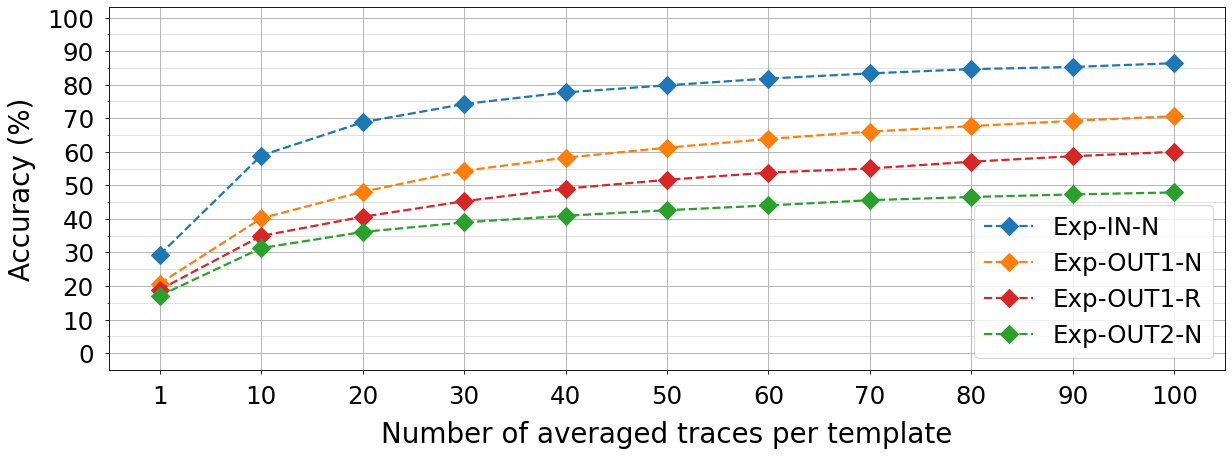

In [43]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.ylabel('Accuracy (%)', fontsize=25, labelpad=10)
plt.xlabel('Number of averaged traces per template', fontsize=25, labelpad=10)
plt.grid(visible=True, which='major')

minor_ticks = np.arange(5, 101, 10)
major_ticks = np.arange(0, 101, 10)

for dataset_id, dataset in enumerate(datasets):
    accuracy_curve = np.array(accuracies.loc[(accuracies.model=='resnet') & (accuracies.dataset==dataset)]['accuracy'])
    ax.plot(range(0, 11), 
            accuracy_curve, 
            color=colors[dataset_id], 
            linewidth='2',
            marker="D",
            markersize=12,
            linestyle='dashed',
            label=dataset_labels[dataset_id])

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_ylim([-5, 103])

ax.set_xticks(range(0, 11), accuracies.averaging.unique());

ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)

plt.legend(loc='lower right')

file_path = "/media/SSD/paper_data/plots/fig-averaging.pdf"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')